# Xray classification



# Business Problem

The business problem is a radiologist who wants to double-check their work with a model that classifies x-rays as Pneumonia or normal.  The practice has supplied us with their x-rays that they have classified and has asked us to build a model which they can refer to on difficult to classify images. 

# Data Understanding

The data consists of 5,856 chest x-ray images. Each image is labelled as either normal or pneumonia.  25% of the images are labelled normal and 75% pneumonia.  The data comes from an x-ray imaging lab. 

In [237]:
from pathlib import Path

In [238]:
import numpy as np

In [239]:
#i=Path('./data/archive/chest_xray/train')

In [240]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img


In [241]:
import tensorflow as tf

Loading and converting data to array format.

In [242]:
#data uploading
#train_data_dir = i

#Get all the data in the directory data/train, and reshape them
#train_generator = ImageDataGenerator().flow_from_directory(
 #train_data_dir, 
   #target_size=(64, 64), batch_size=5216, color_mode = "grayscale")

#Create the datasets
#train_images, train_labels = next(train_generator)

In [243]:
#data uploading


#Directory path
#val_data_dir = './data/archive/chest_xray/val'
#test_data_dir = './data/archive/chest_xray/test'

#Get all the data in the directory data/train (790 images), and reshape them
#val_generator = ImageDataGenerator().flow_from_directory(
        #val_data_dir, 
        #target_size=(64, 64), batch_size= 16, color_mode = "grayscale")

#Get all the data in the directory data/validation (132 images), and reshape them
#test_generator = ImageDataGenerator().flow_from_directory(
        #test_data_dir, 
        #target_size=(64, 64), batch_size=234+390, color_mode = "grayscale")


#Create the datasets
#val_images, val_labels = next(val_generator)
#test_images, test_labels = next(test_generator)

Pickling data

In [244]:
import pickle

In [245]:
#with open('train_images.pickle', 'wb') as f:
    #pickle.dump(train_images, f)

In [246]:
#with open('train_labels.pickle', 'wb') as f:
    #pickle.dump(train_labels, f)

In [247]:
#with open('test_images.pickle', 'wb') as f:
    #pickle.dump(test_images, f)

In [248]:
#with open('test_labels.pickle', 'wb') as f:
    #pickle.dump(test_labels, f)

In [249]:
#with open('val_images.pickle', 'wb') as f:
    #pickle.dump(val_images, f)

    
#with open('val_labels.pickle', 'wb') as f:
    #pickle.dump(val_labels, f)
    


In [250]:
with open('train_images.pickle', 'rb') as g:
    train_images= pickle.load(g)
with open('test_images.pickle', 'rb') as f:
    test_images= pickle.load(f)
with open('val_images.pickle', 'rb') as f:
    val_images= pickle.load(f)
    
with open('train_labels.pickle', 'rb') as f:
    train_labels= pickle.load(f)
with open('test_labels.pickle', 'rb') as f:
    test_labels= pickle.load(f)
with open('val_labels.pickle', 'rb') as f:
    val_labels= pickle.load(f)
    
    

In [251]:
sum(train_labels)+ sum(test_labels)+sum(val_labels)

array([1583., 4273.], dtype=float32)

Class distribution is 1583 to 4273, i.e. 27% and 73%, normal and pneumonia.  

In [252]:
#array_to_image()

### Example 

![scan](./Images/scan.png)


Combining data from train and test files.

In [253]:
t = np.append(train_images, test_images, axis=0)
t1 = np.append(train_labels, test_labels, axis=0)


In [254]:
from sklearn.model_selection import train_test_split

Splitting combined data into training and test groups.

In [255]:
train_images, test_images, train_labels, test_labels = train_test_split(t, t1, test_size = .25, random_state =5) 

Reshaping data for modelling purposes.

In [256]:
test_images = np.reshape(test_images, (np.shape(test_images)[0],64*64))


In [257]:
train_images = np.reshape(train_images, (np.shape(train_images)[0],64*64))
np.shape(train_images)

val_images = np.reshape(val_images, (np.shape(val_images)[0],64*64))


Removing extra column from labels.

In [258]:
train_labels= train_labels[:,0]
val_labels= val_labels[:,0]
test_labels= test_labels[:,0]

Standardizing image data by diving by the maximum pixel value of 255.

In [259]:
train_images=train_images/255



In [260]:
val_images=val_images/255

Imports

In [261]:
import pandas as pd


In [262]:

import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense


# Modeling

Building initial model, a neural network with 1 hidden layer, with 64 neurons.


In [263]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_shape = (4096,), activation = 'tanh'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))


In [264]:
model.compile(optimizer = 'sgd', loss =  'mse', metrics = ['acc'])


In [265]:
model.fit(train_images,train_labels, batch_size=64, epochs=15, validation_data =(val_images,val_labels))


Epoch 1/15
69/69 [==============================] - 1s 5ms/step - loss: 0.1778 - acc: 0.7322 - val_loss: 0.3191 - val_acc: 0.5000
Epoch 2/15
69/69 [==============================] - 0s 4ms/step - loss: 0.1387 - acc: 0.8174 - val_loss: 0.2179 - val_acc: 0.6875
Epoch 3/15
69/69 [==============================] - 0s 4ms/step - loss: 0.1185 - acc: 0.8607 - val_loss: 0.1682 - val_acc: 0.8125
Epoch 4/15
69/69 [==============================] - 0s 3ms/step - loss: 0.1097 - acc: 0.8685 - val_loss: 0.1661 - val_acc: 0.8125
Epoch 5/15
69/69 [==============================] - 0s 3ms/step - loss: 0.1016 - acc: 0.8822 - val_loss: 0.2055 - val_acc: 0.6875
Epoch 6/15
69/69 [==============================] - 0s 3ms/step - loss: 0.0974 - acc: 0.8831 - val_loss: 0.1954 - val_acc: 0.6875
Epoch 7/15
69/69 [==============================] - 0s 3ms/step - loss: 0.0933 - acc: 0.8854 - val_loss: 0.1672 - val_acc: 0.7500
Epoch 8/15
69/69 [==============================] - 0s 4ms/step - loss: 0.0888 - acc: 0.89

88% and 90% validation and training accuracies, suggests possible overfitting. Next model reduces the complexity of the model in order to reduce overfitting.


Builing 1a model with 32 neurons and same tanh activation function.  

In [266]:
model1a = tf.keras.Sequential()
model1a.add(tf.keras.layers.Dense(32, input_shape = (4096,), activation = 'tanh'))

model1a.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
#model.add(tf.keras.layers.Activation('relu'))

In [267]:
model1a.compile(optimizer = 'sgd', loss =  'mse', metrics = ['acc'])


In [268]:
model1a.fit(train_images,train_labels, batch_size=64, epochs=15, validation_data =(val_images,val_labels))


Epoch 1/15
69/69 [==============================] - 1s 4ms/step - loss: 0.1770 - acc: 0.7486 - val_loss: 0.2074 - val_acc: 0.6875
Epoch 2/15
69/69 [==============================] - 0s 3ms/step - loss: 0.1331 - acc: 0.8265 - val_loss: 0.2422 - val_acc: 0.5625
Epoch 3/15
69/69 [==============================] - 0s 3ms/step - loss: 0.1164 - acc: 0.8546 - val_loss: 0.1736 - val_acc: 0.8125
Epoch 4/15
69/69 [==============================] - 0s 3ms/step - loss: 0.1028 - acc: 0.8790 - val_loss: 0.1420 - val_acc: 0.7500
Epoch 5/15
69/69 [==============================] - 0s 3ms/step - loss: 0.0964 - acc: 0.8861 - val_loss: 0.1570 - val_acc: 0.8125
Epoch 6/15
69/69 [==============================] - 0s 3ms/step - loss: 0.0936 - acc: 0.8852 - val_loss: 0.1463 - val_acc: 0.8125
Epoch 7/15
69/69 [==============================] - 0s 3ms/step - loss: 0.0922 - acc: 0.8888 - val_loss: 0.1468 - val_acc: 0.8125
Epoch 8/15
69/69 [==============================] - 0s 3ms/step - loss: 0.0865 - acc: 0.89

Same training acc of 90% but val acc hovering higher at 90% (88% in baseline), suggests overfitting reduced. Next model increases the complexity of the model in order to increase accuracy.

Builing second model by adding to baseline an additional layer with 32 neurons and same tanh activation function.  

In [269]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(64, input_shape = (4096,), activation = 'tanh'))
model2.add(tf.keras.layers.Dense(32, activation = 'tanh'))
model2.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
#model.add(tf.keras.layers.Activation('relu'))

In [270]:
model2.compile(optimizer = 'sgd', loss =  'mse', metrics = ['acc'])


In [271]:
model2.fit(train_images,train_labels, batch_size=64, epochs=15, validation_data =(val_images,val_labels))


Epoch 1/15
69/69 [==============================] - 1s 5ms/step - loss: 0.1767 - acc: 0.7452 - val_loss: 0.3544 - val_acc: 0.5000
Epoch 2/15
69/69 [==============================] - 0s 4ms/step - loss: 0.1324 - acc: 0.8281 - val_loss: 0.2459 - val_acc: 0.5625
Epoch 3/15
69/69 [==============================] - 0s 4ms/step - loss: 0.1149 - acc: 0.8557 - val_loss: 0.2048 - val_acc: 0.6875
Epoch 4/15
69/69 [==============================] - 0s 3ms/step - loss: 0.1017 - acc: 0.8719 - val_loss: 0.3107 - val_acc: 0.5000
Epoch 5/15
69/69 [==============================] - 0s 4ms/step - loss: 0.0958 - acc: 0.8826 - val_loss: 0.1792 - val_acc: 0.7500
Epoch 6/15
69/69 [==============================] - 0s 4ms/step - loss: 0.0936 - acc: 0.8811 - val_loss: 0.1059 - val_acc: 0.9375
Epoch 7/15
69/69 [==============================] - 0s 4ms/step - loss: 0.0886 - acc: 0.8897 - val_loss: 0.1922 - val_acc: 0.6875
Epoch 8/15
69/69 [==============================] - 0s 3ms/step - loss: 0.0849 - acc: 0.89

Model 2 validation accuracy is reduced to 81% as opposed to baseline model's 88% and model 1a's 90%.

Building third model by increasing the learning rate of the optimizer from default .001 to .05 in order to try to increase accuracy.  

Use same layers as model2.

In [272]:
opt = tf.keras.optimizers.SGD(learning_rate = .05)
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(64, input_shape = (4096,), activation = 'tanh'))
model3.add(tf.keras.layers.Dense(32, activation = 'tanh'))
model3.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))



In [273]:
model3.compile(optimizer = opt, loss =  'mse', metrics = ['acc'])


In [274]:
model3.fit(train_images,train_labels, batch_size=64, epochs=15, validation_data =(val_images,val_labels))


Epoch 1/15
69/69 [==============================] - 1s 5ms/step - loss: 0.1905 - acc: 0.7358 - val_loss: 0.3323 - val_acc: 0.5000
Epoch 2/15
69/69 [==============================] - 0s 4ms/step - loss: 0.1544 - acc: 0.7813 - val_loss: 0.2210 - val_acc: 0.6875
Epoch 3/15
69/69 [==============================] - 0s 4ms/step - loss: 0.1318 - acc: 0.8237 - val_loss: 0.1535 - val_acc: 0.8125
Epoch 4/15
69/69 [==============================] - 0s 4ms/step - loss: 0.1144 - acc: 0.8473 - val_loss: 0.1372 - val_acc: 0.7500
Epoch 5/15
69/69 [==============================] - 0s 4ms/step - loss: 0.1040 - acc: 0.8630 - val_loss: 0.1167 - val_acc: 0.8125
Epoch 6/15
69/69 [==============================] - 0s 3ms/step - loss: 0.0952 - acc: 0.8747 - val_loss: 0.1375 - val_acc: 0.8125
Epoch 7/15
69/69 [==============================] - 0s 4ms/step - loss: 0.0939 - acc: 0.8779 - val_loss: 0.1065 - val_acc: 0.8750
Epoch 8/15
69/69 [==============================] - 0s 4ms/step - loss: 0.0868 - acc: 0.88

Appears to be over-learning, minimum loss is overshot.  Model1a has best performance.

![acctable](./Images/acctable.png)


Evaluate model 1a on test set.

In [275]:
test_images=test_images/255

In [276]:
model1a.evaluate(test_images, test_labels)

46/46 [==============================] - 0s 1ms/step - loss: 0.0890 - acc: 0.8870


[0.08899200707674026, 0.8869863152503967]

Accuracy on test set is 86%.

In [277]:
preds = model1a.predict(test_images)

46/46 [==============================] - 0s 1ms/step


In [278]:
yhat= []
for i in preds:
    if i<.5:
        yhat.append(0)
    else:
        yhat.append(1)


In [279]:
from sklearn.metrics import confusion_matrix

In [280]:
cnf = confusion_matrix(test_labels, yhat)

In [281]:
cnf

array([[982,  98],
       [ 67, 313]], dtype=int64)

In [282]:
from sklearn.metrics import ConfusionMatrixDisplay

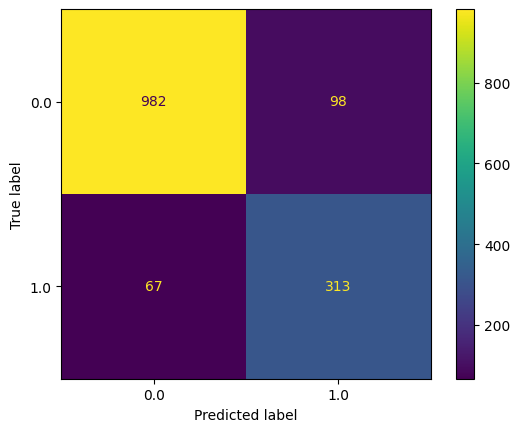

In [283]:
cmd = ConfusionMatrixDisplay(cnf)
cmd=cmd.from_predictions(test_labels, yhat)
cmd

13 false negatives and 188 false positives out of 1460 predictions. False negatives represent pneumonia x-rays classified as normal and are more harmful than false positives. 1% false negative rate is acceptably low.  

# Results/Conclusions

Model1a performed best.  The chosen model's accuracy on the holdout test set was 86%.  This can be compared to guessing based on the sample balance, which would yield 73% accuracy.  The false negative rate was very low at 1%. Thus this model can be used as a check by the radiologist, for instance on x-rays that they are less certain about.  

# Future work


- Use CNN
- Alter activation functions